### HRC Thermistor Temperatures & Trends

A forecast for Henry Bergner's HRC Thermal model, by Grant Tremblay

In [51]:
import os

import datetime as dt

from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table

import matplotlib.pyplot as plt
from matplotlib import dates

import numpy as np
from scipy.interpolate import spline

try:
    from hrcsentinel import hrccore as hrc
except ImportError:
    raise ImportError(
        "hrcsentinel required. Download here: \
        https://github.com/granttremblay/HRCsentinel")

Establish location of MSIDs, fetched by HRCsentinel, as well as the directory you'd like to save figures in. 

In [2]:
home_directory = os.path.expanduser("~")
msid_directory = home_directory + "/Dropbox/HRCOps/MSIDCloud/"

figure_save_directory = home_directory + "/Desktop/"

Thermistor MSIDs we care about:

In [3]:
msids = [
    "2FE00ATM",  # Front-end Temperature (c)
    "2LVPLATM",  # LVPS Plate Temperature (c)
    "2IMHVATM",  # Imaging Det HVPS Temperature (c)
    "2IMINATM",  # Imaging Det Temperature (c)
    "2SPHVATM",  # Spectroscopy Det HVPS Temperature (c)
    "2SPINATM",  # Spectroscopy Det Temperature (c)
    "2PMT1T"  ,  # PMT 1 EED Temperature (c)
    "2PMT2T"  ,  # PMT 2 EED Temperature (c)
    "2DCENTRT",  # Outdet2 EED Temperature (c)
    "2FHTRMZT",  # FEABox EED Temperature (c)
    "2CHTRPZT",  # CEABox EED Temperature (c)
    "2FRADPYT",  # +Y EED Temperature (c)
    "2CEAHVPT",  # -Y EED Temperature (c)
    "2CONDMXT",  # Conduit Temperature (c)
    "2UVLSPXT",  # Snout Temperature (c)
    #"2CE00ATM",  # CEA Temperature 1 (c) THESE HAVE FEWER POINTS AS THEY WERE RECENTLY ADDED BY TOM
    #"2CE01ATM",  # CEA Temperature 2 (c) THESE HAVE FEWER POINTS AS THEY WERE RECENTLY ADDED BY TOM
    "2FEPRATM",  # FEA PreAmp (c)
    # "2SMTRATM",  # Selected Motor Temperature (c) THIS IS ALWAYS 5 DEGREES THROUGHOUT ENTIRE MISSION
    "2DTSTATT"   # OutDet1 Temperature (c)
]

Instantiate an empty dictionary for all of these MSIDs:

In [4]:
data = {}

Populate the MSIDs with times and values. We'll use daily averages. Uses the simple `parse_generic_msid()` function from [HRCsentinel](https://github.com/granttremblay/HRCsentinel). 

In [5]:
valtype = "means"

for msidname in msids:
    print("Reading DAILY {} for {}".format(valtype.upper(), msidname))
    times, values = hrc.parse_generic_msid(msid_directory + "{}".format(msidname) + "_daily_lifetime.csv", valtype)
    data["{}_times".format(msidname)] = times
    data["{}_values".format(msidname)] = values

Reading DAILY MEANS for 2FE00ATM
Reading DAILY MEANS for 2LVPLATM
Reading DAILY MEANS for 2IMHVATM
Reading DAILY MEANS for 2IMINATM
Reading DAILY MEANS for 2SPHVATM
Reading DAILY MEANS for 2SPINATM
Reading DAILY MEANS for 2PMT1T
Reading DAILY MEANS for 2PMT2T
Reading DAILY MEANS for 2DCENTRT
Reading DAILY MEANS for 2FHTRMZT
Reading DAILY MEANS for 2CHTRPZT
Reading DAILY MEANS for 2FRADPYT
Reading DAILY MEANS for 2CEAHVPT
Reading DAILY MEANS for 2CONDMXT
Reading DAILY MEANS for 2UVLSPXT
Reading DAILY MEANS for 2FEPRATM
Reading DAILY MEANS for 2DTSTATT


You can quickly plot any of these with, e.g., 

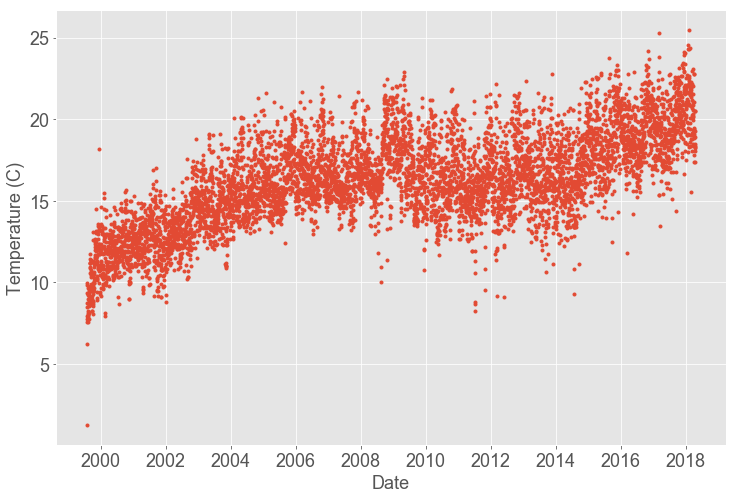

In [6]:
outfile = figure_save_directory + "2CE00ATM.pdf"
hrc.dateplot(data['2CONDMXT_times'], data['2CONDMXT_values'], ylabel="Temperature (C)", markersize=3.0, save=False, filename=outfile)

You can compute 30 day means and write it to a sortable table like this:

In [7]:
ave_table = Table()

all_names = []
all_means = []
all_stds = []


for msidname in msids:
    daybin = 100 # number of days over which to average the daily averages
    mean = np.mean(data["{}_values".format(msidname)][-daybin:]).round(2)
    std = np.std(data["{}_values".format(msidname)][-daybin:]).round(2)
    
    all_names.append(msidname)
    all_means.append(mean)
    all_stds.append(std)
    
ave_table["MSIDName"] = all_names
ave_table["Average".format(daybin)] = all_means
ave_table["STD"] = all_stds

In [8]:
ave_table.show_in_notebook

<bound method Table.show_in_notebook of <Table length=17>
MSIDName Average   STD  
  str8   float64 float64
-------- ------- -------
2FE00ATM   22.11    1.34
2LVPLATM   28.19    1.46
2IMHVATM   31.66    1.37
2IMINATM   18.94    1.71
2SPHVATM    32.2    2.19
2SPINATM    20.3    1.75
  2PMT1T   21.33    2.09
  2PMT2T   23.76    2.18
2DCENTRT   19.43    1.79
2FHTRMZT   22.41    1.72
2CHTRPZT   23.78    1.92
2FRADPYT   18.17    1.69
2CEAHVPT   27.28    2.06
2CONDMXT   20.53    1.83
2UVLSPXT   15.27    1.94
2FEPRATM   24.78    1.52
2DTSTATT    20.2    1.69>

Sort the table in ascending order by Average temperature, so that we can make a pretty sequential plot later

In [9]:
ave_table.sort("Average")
ave_table

MSIDName,Average,STD
str8,float64,float64
2UVLSPXT,15.27,1.94
2FRADPYT,18.17,1.69
2IMINATM,18.94,1.71
2DCENTRT,19.43,1.79
2DTSTATT,20.2,1.69
2SPINATM,20.3,1.75
2CONDMXT,20.53,1.83
2PMT1T,21.33,2.09
2FE00ATM,22.11,1.34


Now create a REORDERED list of MSID names, ordered by increasing average temperature, in order to make pretty sequential color cycles

In [10]:
ordered_msidlist = ave_table["MSIDName"]

We can plot all MSIDs together, like this: 

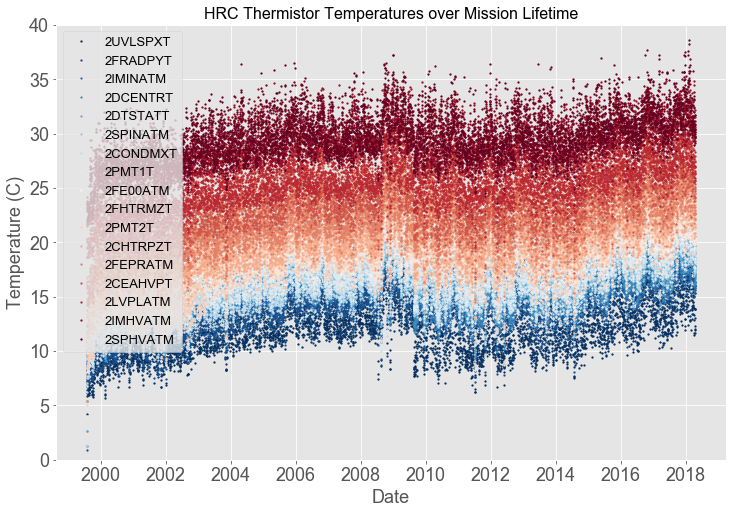

In [11]:
figure_savename = figure_save_directory + "all_msids_figure.pdf"
rasterized = True # Make this True to ensure the file size is small. Otherwise you're plotting thousands of vector points. 

fig, ax = plt.subplots(figsize=(12, 8))

n_lines = len(ordered_msidlist)
color_idx = np.linspace(0, 1, n_lines)


for i, msidname in zip(color_idx, ordered_msidlist):
    ax.plot_date(data["{}_times".format(msidname)],
                 data["{}_values".format(msidname)], '.', alpha=1.0, markersize=2.5, label='{}'.format(msidname), color=plt.cm.RdBu_r(i), rasterized=rasterized)
    ax.set_ylabel('Temperature (C)')
    ax.set_xlabel('Date')
    ax.set_ylim(0, 40)
    
    ax.set_title("HRC Thermistor Temperatures over Mission Lifetime")
    #ax.legend()
    #ax.set_ylim(10, 40)


ax.legend(loc=2, prop={'size': 13})
    
plt.show()

fig.savefig(figure_savename, dpi=300)

We can also easily take a yearly (i.e. 365 day window) moving average to smooth this out. This is effectively an efficient convolution. 

In [12]:
window = 365 # days, i.e. a year

In [13]:
def compute_yearly_average(values, window):
    
    array = values

    cumulative_sum, moving_aves = [0], []

    for i, x in enumerate(array, 1):
        cumulative_sum.append(cumulative_sum[i-1] + x)
        if i>=window:
            moving_ave = (cumulative_sum[i] - cumulative_sum[i-window])/window
            #can do stuff with moving_ave here
            moving_aves.append(moving_ave)
            
    # This does not preserve array size, reducing its length by N-1 values. 
    # We can be lazy and simply pad it to ensure it has the same value
    
    #np.pad(moving_aves, values, mode='constant', constant_values=(np.nan,))

    return moving_aves
    

Run this function in a loop to compute and plot all moving averages

In [14]:
all_trends = {}

for msidname in msids: 
    moving_aves = compute_yearly_average(data["{}_values".format(msidname)], window)
    all_trends["{}_trend".format(msidname)] = moving_aves


This, of course, does not preserve array size - it cuts off the first 364 datapoints if your window is 365 days

In [15]:
len(data["2UVLSPXT_times"]) - len(all_trends["2UVLSPXT_trend"])

364

But we can be super lazy and just fix this on-the-fly, e.g.

In [16]:
time_corrector = window-1

In [17]:
len(data["2UVLSPXT_times"][time_corrector:]) - len(all_trends["2UVLSPXT_trend"])

0

Good! 

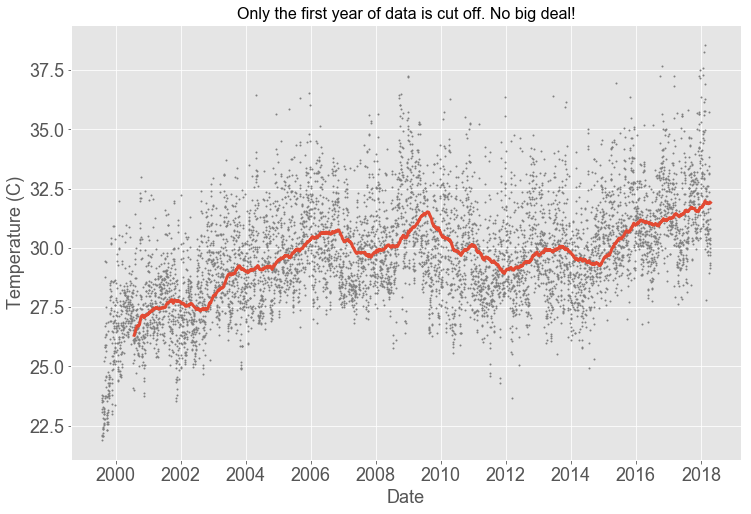

In [18]:
figure_savename = figure_save_directory + "trend_plus_realdata_comparison.pdf"
rasterized = True # Make this True to ensure the file size is small. Otherwise you're plotting thousands of vector points. 

hrc.styleplots()
fig, ax = plt.subplots(figsize=(12,8))

ax.plot_date(data["2SPHVATM_times"], data["2SPHVATM_values"], '.',markersize=2, color='gray', rasterized=rasterized)
ax.plot_date(data["2SPHVATM_times"][time_corrector:], all_trends["2SPHVATM_trend"], '-', lw=3, rasterized=rasterized)

ax.set_ylabel("Temperature (C)")
ax.set_xlabel("Date")

ax.set_title("Only the first year of data is cut off. No big deal!")

plt.show()

fig.savefig(figure_savename, dpi=300)

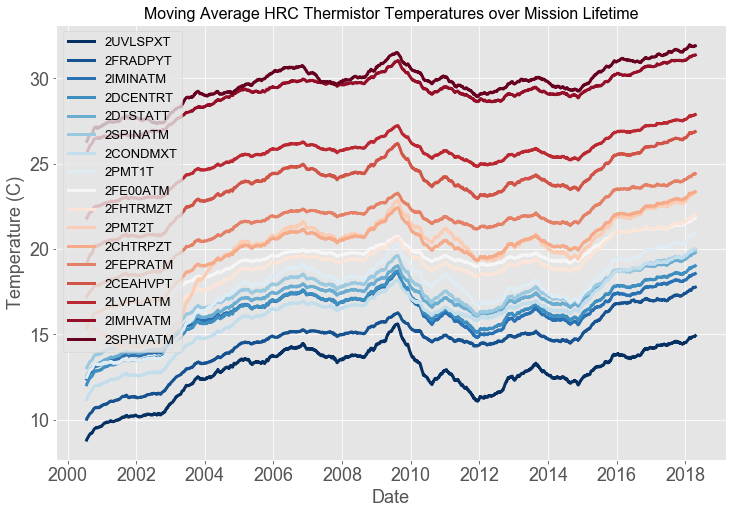

In [19]:
figure_savename = figure_save_directory + "all_trends_lifetime.pdf"
rasterized = True # Make this True to ensure the file size is small. Otherwise you're plotting thousands of vector points.

hrc.styleplots()
fig, ax = plt.subplots(figsize=(12,8))

n_lines = len(msids)
color_idx = np.linspace(0, 1, n_lines)

names = ave_table['MSIDName']


for i, msidname in zip(color_idx, names):
    #ax.plot(all_trends["{}_trend".format(msidname)], lw=3.0, label=msidname, color=plt.cm.coolwarm(i))
    ax.plot_date(data["{}_times".format(msidname)][364:], all_trends["{}_trend".format(msidname)], '-', label='{}'.format(msidname), lw=3.0, color=plt.cm.RdBu_r(i), rasterized=rasterized)


ax.legend(loc=0, prop={'size': 13})

ax.set_title("Moving Average HRC Thermistor Temperatures over Mission Lifetime")
ax.set_ylabel("Temperature (C)")
ax.set_xlabel("Date")

plt.show()

fig.savefig(figure_savename, dpi=300)

The slope has clearly been pretty constant (and roughly the same for all thermistors!) over the past twoish years, i.e. Oct. 2015 - now: 

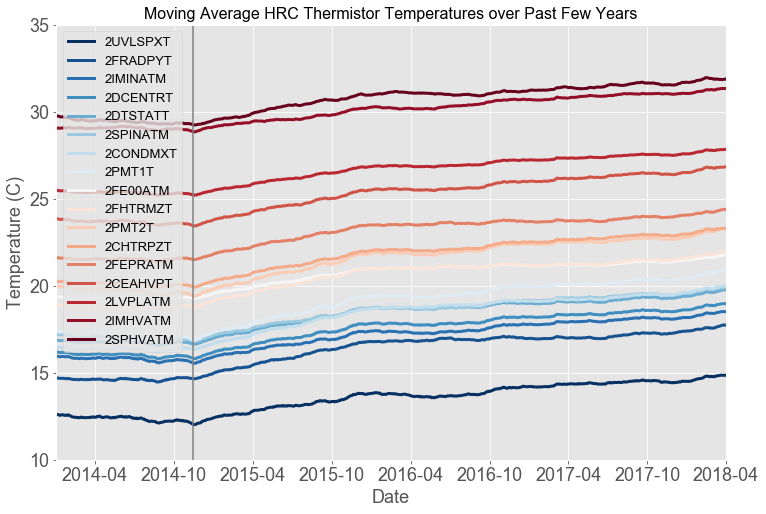

In [20]:
figure_savename = figure_save_directory + "all_trends_recent.pdf"
rasterized = True # Make this True to ensure the file size is small. Otherwise you're plotting thousands of vector points.

hrc.styleplots()
fig, ax = plt.subplots(figsize=(12,8))

n_lines = len(msids)
color_idx = np.linspace(0, 1, n_lines)

names = ave_table['MSIDName']


for i, msidname in zip(color_idx, names):
    #ax.plot(all_trends["{}_trend".format(msidname)], lw=3.0, label=msidname, color=plt.cm.coolwarm(i))
    ax.plot_date(data["{}_times".format(msidname)][time_corrector:], all_trends["{}_trend".format(msidname)], '-', label='{}'.format(msidname), lw=3.0, color=plt.cm.RdBu_r(i), rasterized=rasterized)


ax.legend(prop={'size': 13})

ax.set_title("Moving Average HRC Thermistor Temperatures over Past Few Years")
ax.set_ylabel("Temperature (C)")
ax.set_xlabel("Date")

# By eye, this is roughly the time of the slope change
inflection = dt.date(2014, 11, 15)

ax.set_xlim(dt.date(2014, 1, 1), dt.date(2018, 4, 1))
ax.set_ylim(10, 35)

ax.axvline(inflection, color='gray')

plt.show()

fig.savefig(figure_savename, dpi=300)

`inflection` is the datetime of the vertical line above. Lets find the nearest index that corresponds to that date, so that we can compute clean slopes starting at that index, toward the end of each trend array. 

In [21]:
def find_index_at_date(array,value):
    '''
    Given an input array, find the index of the item in that array closest to the given value
    '''
    index = (np.abs(array-value)).argmin()
    return index

In [22]:
start_index = find_index_at_date(data["2UVLSPXT_times"][time_corrector:], dates.date2num(inflection))
start_index

5228

Now we can calculate the slopes of every thermistor over this time interval. We can easily do this with `numpy.polyfit()`. 

In [23]:
def fit_slope(x, y):
    coeffs = np.polyfit(x, y, deg=1)
    # for a deg=1 (linear) polynomial, m, b = coeffs[0], coeffs[1] in y = mx + b
    
    return coeffs

Check that it works. 

In [24]:
fit_slope(data["2UVLSPXT_times"][time_corrector:][start_index:], all_trends["2UVLSPXT_trend"][start_index:])

array([  1.84110830e-03,  -1.34157570e+03])

Compute coefficients for all MSIDs: 

In [25]:
all_coeffs = {} # instantiate an emtpy dictionary to hold these

for msidname in names:
    coeffs = fit_slope(data["{}_times".format(msidname)][time_corrector:][start_index:], all_trends["{}_trend".format(msidname)][start_index:])
    print("Slope and Intercept for {} are {}, adding to all_coeffs dictionary.".format(msidname, coeffs))
    all_coeffs["{}".format(msidname)] = coeffs

Slope and Intercept for 2UVLSPXT are [  1.84110830e-03  -1.34157570e+03], adding to all_coeffs dictionary.
Slope and Intercept for 2FRADPYT are [  1.83989609e-03  -1.33782840e+03], adding to all_coeffs dictionary.
Slope and Intercept for 2IMINATM are [  1.93349299e-03  -1.40599184e+03], adding to all_coeffs dictionary.
Slope and Intercept for 2DCENTRT are [  2.03323791e-03  -1.47901301e+03], adding to all_coeffs dictionary.
Slope and Intercept for 2DTSTATT are [  1.93182068e-03  -1.40352664e+03], adding to all_coeffs dictionary.
Slope and Intercept for 2SPINATM are [  2.02757640e-03  -1.47390463e+03], adding to all_coeffs dictionary.
Slope and Intercept for 2CONDMXT are [  2.36367448e-03  -1.72141480e+03], adding to all_coeffs dictionary.
Slope and Intercept for 2PMT1T are [  2.60754688e-03  -1.90020593e+03], adding to all_coeffs dictionary.
Slope and Intercept for 2FE00ATM are [  1.48722959e-03  -1.07396822e+03], adding to all_coeffs dictionary.
Slope and Intercept for 2FHTRMZT are [ 

In [26]:
years_to_forecast = 10
daypad = years_to_forecast * 365
future_timerange = np.arange(dates.date2num(inflection), dates.date2num(inflection)+daypad, 10)

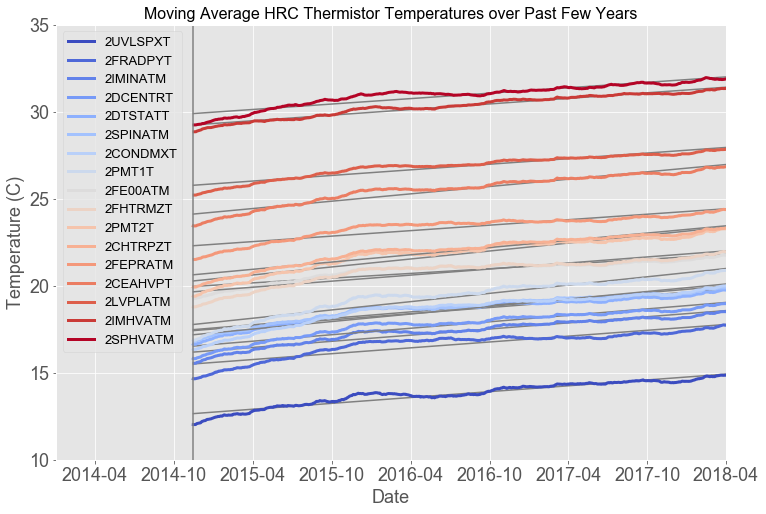

In [27]:
figure_savename = figure_save_directory + "slope_plot.pdf"
rasterized = True # Make this True to ensure the file size is small. Otherwise you're plotting thousands of vector points.

hrc.styleplots()
fig, ax = plt.subplots(figsize=(12,8))

n_lines = len(msids)
color_idx = np.linspace(0, 1, n_lines)

names = ave_table['MSIDName']


for i, msidname in zip(color_idx, names):
    ax.plot(future_timerange, all_coeffs["{}".format(msidname)][0] * future_timerange + all_coeffs["{}".format(msidname)][1], '-', color='gray')
    ax.plot_date(data["{}_times".format(msidname)][364:][start_index:], all_trends["{}_trend".format(msidname)][start_index:], '-', lw=3.0, label='{}'.format(msidname), color=plt.cm.coolwarm(i), rasterized=rasterized)


ax.legend(prop={'size': 13})

ax.set_title("Moving Average HRC Thermistor Temperatures over Past Few Years")
ax.set_ylabel("Temperature (C)")
ax.set_xlabel("Date")

# By eye, this is roughly the time of the slope change
inflection = dt.date(2014, 11, 15)

ax.set_xlim(dt.date(2014, 1, 1), dt.date(2018, 4, 1))
ax.set_ylim(10, 35)

ax.axvline(inflection, color='gray')

plt.show()

fig.savefig(figure_savename, dpi=300)

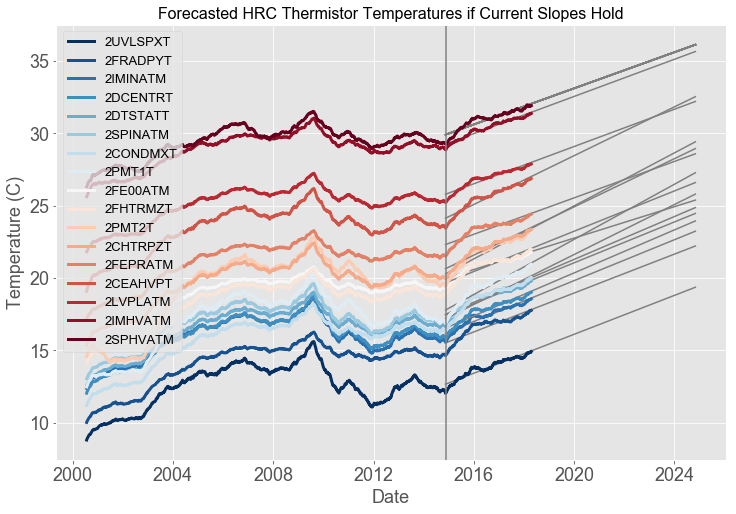

In [62]:
figure_savename = figure_save_directory + "all_trends_and_slopes_lifetime.pdf"
rasterized = True # Make this True to ensure the file size is small. Otherwise you're plotting thousands of vector points.

hrc.styleplots()
fig, ax = plt.subplots(figsize=(12,8))

n_lines = len(msids)
color_idx = np.linspace(0, 1, n_lines)

names = ave_table['MSIDName']


for i, msidname in zip(color_idx, names):
    ax.plot(future_timerange, all_coeffs["{}".format(msidname)][0] * future_timerange + all_coeffs["{}".format(msidname)][1], '-', color='gray')
    ax.plot(future_timerange, coeffs[0] * future_timerange + coeffs[1], color='gray')
    ax.plot_date(data["{}_times".format(msidname)][364:], all_trends["{}_trend".format(msidname)], '-', lw=3.0, label='{}'.format(msidname), color=plt.cm.RdBu_r(i), rasterized=rasterized)


ax.legend(loc=2, prop={'size': 13})

ax.set_title("Forecasted HRC Thermistor Temperatures if Current Slopes Hold")
ax.set_ylabel("Temperature (C)")
ax.set_xlabel("Date")

ax.axvline(inflection, color='gray')

plt.show()

fig.savefig(figure_savename, dpi=300)

#### Forecasts

Finally, we can make some (very simple) projections, under the (almost assuredly incorrect) assumption that the current (i.e. ~2 year) slope holds for the next 10 years. This will very likely not be the case. But it's still a useful exercise, and probably not *too* far off. Ralph, Dan, and Paul will have good thoughts on this, too. 

In [57]:
def forecast_future_temp(year, msidname, coeffs):
    
    # Find the index of the future timeline at given year
    timeline = np.arange(dates.date2num(dt.datetime(2016, 1, 1)), dates.date2num(dt.datetime(2035, 1, 1)), 10)
    index = find_index_at_date(timeline, dates.date2num(dt.datetime(year, 1, 1)))
    
    # Forecast the temperature using the best-fit line
    future_temp = (coeffs[0] * timeline[index] + coeffs[1]).round(2)
    
    #print("{} in {} at {} degrees C.".format(msidname, year, future_temp))
    #print("{}".format(future_temp))
    return future_temp

In [59]:
namecolumn = names
forecasts = {}

years_to_forecast = [2018, 2020, 2022, 2024, 2026, 2028, 2030]

for year in years_to_forecast:
#     print("\nForecasting for {}".format(year))
#     print("--------------------")
    
    templist = []
    for msidname in names: 
        temp = forecast_future_temp(year, msidname, all_coeffs["{}".format(msidname)])
        templist.append(temp)
    forecasts["{}".format(year)] = templist

Let's create a clean Astropy table of these forecasts for easier portability, etc. 

In [60]:
forecast_table = Table()

forecast_table["MSID Names"] = namecolumn
forecast_table["2018"] = forecasts["2018"]
forecast_table["2020"] = forecasts["2020"]
forecast_table["2022"] = forecasts["2022"]
forecast_table["2024"] = forecasts["2024"]
forecast_table["2026"] = forecasts["2026"]
forecast_table["2028"] = forecasts["2028"]
forecast_table["2030"] = forecasts["2030"]

In [61]:
forecast_table

MSID Names,2018,2020,2022,2024,2026,2028,2030
str8,float64,float64,float64,float64,float64,float64,float64
2UVLSPXT,14.76,16.1,17.45,18.79,20.13,21.48,22.82
2FRADPYT,17.61,18.96,20.3,21.64,22.98,24.33,25.67
2IMINATM,18.4,19.81,21.22,22.64,24.05,25.46,26.87
2DCENTRT,18.86,20.35,21.83,23.31,24.8,26.28,27.77
2DTSTATT,19.63,21.04,22.45,23.86,25.27,26.69,28.1
2SPINATM,19.8,21.28,22.76,24.24,25.72,27.2,28.68
2CONDMXT,19.89,21.62,23.34,25.07,26.79,28.52,30.24
2PMT1T,20.76,22.66,24.57,26.47,28.37,30.28,32.18
2FE00ATM,21.66,22.75,23.84,24.92,26.01,27.09,28.18


Save this as FITS and ASCII tables. 

In [54]:
forecast_table_fits = fits.BinTableHDU(data=forecast_table)
forecast_table_fits.writeto(figure_save_directory + "forecast_table.fits", overwrite=True)

ascii.write(forecast_table, figure_save_directory + "forecast_table.txt")